Kaggle Challenge

Overview: The dataset of the Cookie Cats is from a Kaggle challenge.Its a mobile puzzle game where the same colour tiles should be connected to clear the board and win the level. After crossing various levels, there are gates placed which are usually there to show users ads or it is a paywall to purchase the app this acts as an income for the mobile puzzle game.

Problem: We now consider a challenge of placing gates. Initially the control group has a gate placed on level 30, but what if we place the gate at level 40. There are chances the user might be interested to play more i.e. retention might increase for each player and increasing the traffic for the mobile game but to be confident enough we should back up our conversion rates with valid explaination or statistical analysis. To check whether placing gate is leading to more retention we perform A/B testing.

The unit of diversion is a user id through which the user(experimental units) are randomly split into two different groups i.e. Control and Experiment. 
Evaluation metric or response variable chosen here is the retention of a player.This metric is used to measure the impact of your change. Retention is basically people coming back to your product to use it gain.

Our interest lies in comparing means of both the control and experimental group 

We first start with EDA of the dataset to get a picture of what kind of data is and what it holds.


Generate Hypothesis: 
Null Hypothesis: It states there is no difference between the control and experiment group. 
                 The conversions rates are same in both the groups.
                 There is no statistical significanct result.

Alternate Hypothesis: There is difference between the control and experiment group.
                      Convsersion rates are different in both groups
                      It gives Statistical Significant result


Rejecting the Null Hypothesis
Determine their is a difference between the treatment and control
Statistically signicant result


Power analysis and Significance level: Once after deciding the metrics and the hypothesis, we should check whether do we have enough data to run our A/B testing. When calculating sample size these errors should be avoided:
<li>To avoid type I errors, you specify a significance level when calculating the sample size.
<li>To avoid type II errors, you set the power at 0.8 or 0.9 if possible when calculating your sample size, making sure that the sample size is large enough.

For this problem, We choose a confidence Interval i.e. 95% that gives us the value of alpha=0.05 and beta .
Significance Level of the test(Alpha) =0.05
Power level of the test( 1 - Beta) = 

A test having a smaller significance level and high power is desirable.

The goal of power analysis is to estimate sample size using the values of alpha and beta.


Before performing a T test, one should satisfy these conditions:
<li>To perform a Z test, one should have a sample size greater than or equal to 30.
<li>The experimental units( users) should be independent to each other and randomly selected from the population.
<li>The mean and standard deviation of the population should be known.

To get a significant difference for a Z test, the sample and population means are compared. It is assumed that Z test statistic has a normal distribution.

Bootstrapping?


Conclusion : If the p value is smaller than the alpha(0.05) . Then we can reject the null hypothesis


In [6]:
#Importing Libraries needed for this project

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math as mt
from __future__ import division



In [7]:
# Importing the dataset
cookie_cats = pd.read_csv("C:/Users/VArun/Downloads/cookie_cats.csv")

<h1><b>Data Wrangling and Exploratory Data Analysis<b>

In [8]:
#Checking what kind of data is stored
cookie_cats[0:10]

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [9]:
#Checking if any null data is present
cookie_cats.notnull().count()

userid            90189
version           90189
sum_gamerounds    90189
retention_1       90189
retention_7       90189
dtype: int64

In [10]:
#To check whether any userid is duplicate
cookie_cats.userid.nunique()

90189

In [11]:
cookie_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


From the above data, it can be seen that:
<li>The values in the dataset do not have any null values.
<li> The userid contains all unique ids
<li>The sum_gamerounds variable is an integer value while retention_1 and retention_7 are boolean variables( 1 or 0 ; True or False)
<li>version is a categorical variable

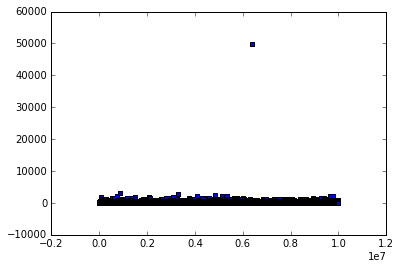

In [12]:
#Let's check for outliers in a numerical variable
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(cookie_cats.userid,cookie_cats['sum_gamerounds'], c = "blue", marker = "s")
plt.figure()

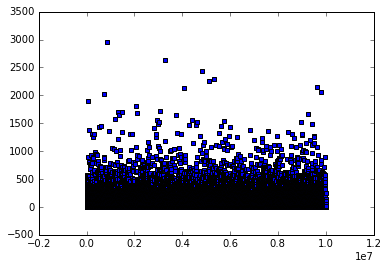

In [13]:
#From the above figure it can be seen there is an outlier present in the data.
#The values of outliers gives us an incorrect information if used in analysis. It's better to get rid of it.
cookie_cats=cookie_cats[cookie_cats['sum_gamerounds']<40000]
plt.scatter(cookie_cats.userid,cookie_cats['sum_gamerounds'], c = "blue", marker = "s")
plt.figure()


In [14]:
# Summary Statistics for the each version 
cookie_cats.groupby('version')['sum_gamerounds'].agg(['sum','count','mean','min','max']).reset_index().rename(columns={'sum':'Total_Games_Played','count':'Total_Users', 'mean':'Average', 'min':'Min_value','max':'Max_value'})

,version,Total_Games_Played,Total_Users,Average,Min_value,Max_value
0,gate_30,2294941,44699,51.342111,0,2961
1,gate_40,2333530,45489,51.298776,0,2640


This table tells gives us: 
<li>sum_gamesplayed: The total games played in each variant
<li>Total_users: Total number of users who played games
<li>The average number of games played by a user in each variant which is nearly same for the experiment and control group
<li> The min and max values of games which is played by a user

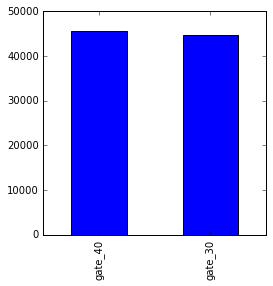

In [130]:
# The sample size is almost same or the total number of users are nearly same
cookie_cats['version'].value_counts().plot(kind='bar', figsize=(4,4));

The main aim of this analysis is to understand when the user retention is more and for which group considering the gate placed. But, I wanted to check how many games a user usually plays.

In [16]:
# Here we group the data as per the games played and the number of users who played it.
plot_gamerounds=cookie_cats.groupby('sum_gamerounds')['userid'].count().reset_index().rename(columns={'userid':'Total_users'})
plot_gamerounds.head(30)

,sum_gamerounds,Total_users
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


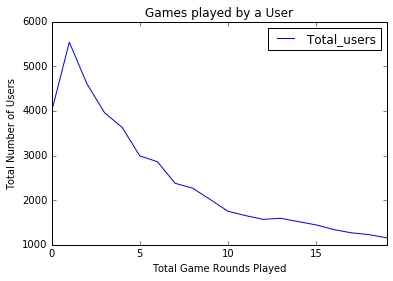

In [17]:
# Now Plotting the same table in a graph but the total rounds played is 20.
ax = plot_gamerounds.head(20).plot(x='sum_gamerounds', y='Total_users')
ax.set_xlabel("Total Game Rounds Played")
ax.set_ylabel("Total Number of Users")
ax.set_title("Games played by a User")

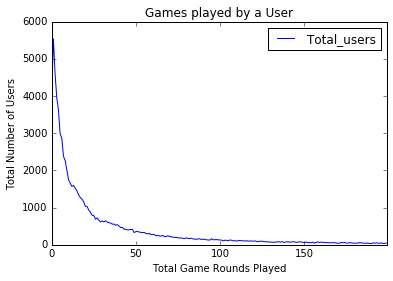

In [131]:
# Now Plotting the same table in a graph but the total rounds played is 200.
ax = plot_gamerounds.head(200).plot(x='sum_gamerounds', y='Total_users')
ax.set_xlabel("Total Game Rounds Played")
ax.set_ylabel("Total Number of Users")
ax.set_title("Games played by a User")

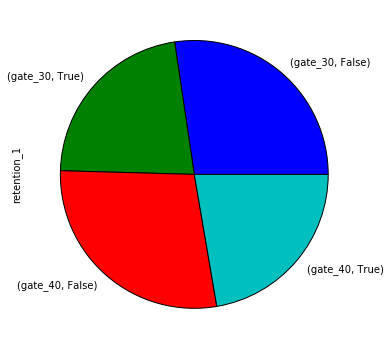

In [19]:
# This graph checks the number of true and false values for column 'retention_1' for both the Control and Experiment group
cookie_cats.groupby('version')['retention_1'].value_counts().plot(kind='pie', figsize=(6,6))

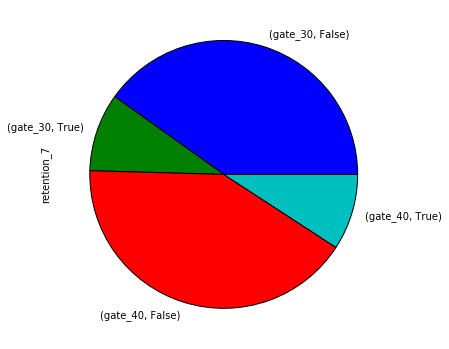

In [20]:
# This graph checks the number of true and false values for column 'retention_7' for both the Control and Experiment group
cookie_cats.groupby('version')['retention_7'].value_counts().plot(kind='pie', figsize=(6,6))

The above pie graph is showing the retention on day 1 is more as compared to day 7 for both the control and experiment groups. Now, lets get a value i.e. conversion rates for day 1 retention and day 7 retention because the graph isn't showing a satisfied image because of the difference which is very less.

<b>We then calculated the convention rate for each variation.</b>

Before getting the conversion rates. Let's understand what variant is?
<br>Variant is a change which we are planning to test with comparison to the default website.
In this case we test that at which game level we should introduce the gate so that the retention rate is higher i.e. user plays the game again.

<b> Day 1 Retention for Control and Experiment Group <b>

In [149]:
#Lets look at the conversion rate for the day 1 retention for gate_30 i.e. Control Group
retention_day_1=cookie_cats.groupby('version')['retention_1'].sum() 
user_table_day1=cookie_cats.groupby('version')['userid'].count()
retention_gate_30_day1=round((retention_day_1['gate_30']/user_table_day1['gate_30']),4)
perc_retention_gate_30=round(retention_gate_30_day1*100,2)
print('The proportion of retention after day 1 for Control group is %s' %retention_gate_30_day1)
print('The percentage of retention after day 1 for Control group is %s%%' %perc_retention_gate_30)

The proportion of retention after day 1 for Control group is 0.4482
The percentage of retention after day 1 for Control group is 44.82%


In [22]:
retention_day_1

version
gate_30    20034.0
gate_40    20119.0
Name: retention_1, dtype: float64

In [150]:
#Lets look at the conversion rate for the day 1 retention for gate_40 i.e. Experiment Group
retention_gate_40_day1=round((retention_day_1['gate_40']/user_table_day1['gate_40']),4)
perc_retention_gate_40=round(retention_gate_40_day1*100,2)
#perc_retention_gate_40
print('The proportion of retention after day 1 for Experiment group is %s' %retention_gate_40_day1)
print('The percentage of retention after day 1 for Experiment group is %s%%' %perc_retention_gate_40)

The proportion of retention after day 1 for Experiment group is 0.4423
The percentage of retention after day 1 for Experiment group is 44.23%


<b> Day 7 Retention for Control and Experiment Group </b>

In [151]:
#Lets look at the conversion rate for the day 7 retention for gate_30 i.e. Control Group
retention_day_7=cookie_cats.groupby('version')['retention_7'].sum() 
user_table_day7=cookie_cats.groupby('version')['userid'].count()
retention_gate_30_day7=(retention_day_7['gate_30']/user_table_day7['gate_30'])
perc_retention_gate_30_day7=round(retention_gate_30_day7*100,2)
print('The proportion of retention after day 7 for Control group is %s' %retention_gate_30_day7)
print('The percentage of retention after day 7 for Control group is %s%%' %perc_retention_gate_30_day7)

The proportion of retention after day 7 for Control group is 0.19018322557551623
The percentage of retention after day 7 for Control group is 19.02%


In [154]:
#Lets look at the conversion rate for the day 1 retention for gate_40 i.e. Experiment Group
retention_gate_40_day7=(retention_day_7['gate_40']/user_table_day7['gate_40'])
perc_retention_gate_40_day7=round(retention_gate_40_day7*100,2)
#perc_retention_gate_40
print('The proportion of retention after day 7 for Experiment group is %s ' %retention_gate_40_day7)
print('The percentage of retention after day 7 for Experiment group is %s%%' %perc_retention_gate_40_day7)

The proportion of retention after day 7 for Experiment group is 0.18200004396667327 
The percentage of retention after day 7 for Experiment group is 18.2%


In [28]:
retention_day_7

version
gate_30    8501.0
gate_40    8279.0
Name: retention_7, dtype: float64

From the above retention it could be seen that retention rates are higher in the control group. Also, retention rate is much higher for day 1 as compared to day 7. But this could be by chance,we need to be sure that this did not happen by chance. The situation isn’t as clear as you might think because we’re analyzing a sample instead of the full population.There are huge benefits when working with samples because it is usually impossible to collect data from an entire population. However, the tradeoff for working with a manageable sample is that we need to account for sample error. The sampling error is the gap between the sample statistic and the population parameter.

<h2> Let's Start with th A/B Testing </h2>

Hypothesis testing is a form of inferential statistics that allows us to draw conclusions about an entire population based on a representative sample.

Gate Level: Control (Gate_30) and Experiment (Gate_40)

Questions before making any changes or trying A/B testing:
<li>Will introducing the paywall or ads at gate_40 will bring the users back or retention rate higher?
<li> Is retention at different days make any difference?


To calculate the Marginal Error:
<li> Calculate the pooled Standard Error
<li> The value of z which is the store statistic

In [106]:
p_pool_day1 = (retention_day_1['gate_30'] + retention_day_1['gate_40'])/(user_table_day1['gate_30']+user_table_day1['gate_40'])
p_pool_day1


0.4452144409455803

In [155]:
se_pool_day1=round(mt.sqrt(p_pool_day1*(1-p_pool_day1)*(1/user_table_day1['gate_30']+ 1/user_table_day1['gate_40'])),4)
se_pool_day1


0.0033

In [156]:
# For 95% confidence interval the value of Z is 1.96 either we can use Z score table or we can use scipy package to calculate it
alpha=0.05
z=round(norm.ppf(1-alpha/2),2)
#Marginal Error calculation
Marginal_Error=round((z*se_pool_day1),4)
Marginal_Error

0.0065

In [114]:
#The mean difference in the samples
p_difference = round((retention_gate_40_day1-retention_gate_30_day1),4)
p_difference

-0.0059

In [115]:
print ("The confidence interval is (%s, %s)" %(p_difference-Marginal_Error,p_difference+Marginal_Error))

The confidence interval is (-0.0124, 0.0006)


In [116]:
t_statistic=p_difference-Marginal_Error
t_statistic

-0.0124

In [158]:
if t_statistic>0.05:
    print("Experiment performed better than control. It is statistically and practically significant")
elif t_statistic>0:
    print("Experiment performed better than control.It is statistically significant but not practically")
elif t_statistic<0:
    print("Control ia better than the Experiment. Hence, No need to make changes. ")

Control ia better than the Experiment. Hence, No need to make changes. 


In [159]:
#cohen's d
d=round((p_difference/se_pool_day1),2)
d

-1.79

<b>Day 7 Statistical Analysis<b>

In [119]:
p_pool_day7 = round((retention_day_7['gate_30'] + retention_day_7['gate_40'])/(user_table_day7['gate_30']+user_table_day7['gate_40']),4)
p_pool_day7

0.1861

In [120]:
se_pool_day7=round(mt.sqrt(p_pool_day7*(1-p_pool_day7)*((1/user_table_day7['gate_30']) + (1/user_table_day7['gate_40']))),4)
se_pool_day7

0.0026

In [94]:
# For 95% confidence interval the value of Z is 1.96
Marginal_Error_day7=z*se_pool_day7
Marginal_Error_day7

0.005096

In [97]:
p_difference = round((retention_gate_40_day7-retention_gate_30_day7),4)
p_difference

-0.0082

In [98]:
t_statistic_7=p_difference-Marginal_Error_day7
t_statistic_7

-0.013296

In [99]:
print ("The confidence interval is" ,p_difference-Marginal_Error_day7 ,"and", p_difference+Marginal_Error_day7,)

('The confidence interval is', -0.013296, 'and', -0.003104000000000001)


In [127]:
if t_statistic>0.05:
    print("Experiment performed better than control. It is statistically and practically significant")
elif t_statistic>0:
    print("Experiment performed better than control.It is statistically singnificant but not practically")
elif t_statistic<0:
    print("Control ia better than the Experiment. Hence, No need to make changes ")

Control ia better than the Experiment. Hence, No need to make changes 


In [128]:
#Cohen's d
d=p_difference/se_pool_day7
d

-2.269230769230769